In [19]:
!pip install qiskit qiskit_aer

In [20]:
%matplotlib inline

In [21]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# -----------------------------
# Oracle
# -----------------------------
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

# -----------------------------
# Diffuser
# -----------------------------
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

# -----------------------------
# Build Grover Circuit
# -----------------------------
def grover_search(marked_state, iterations=1):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

# -----------------------------
# Run on Simulator
# -----------------------------
def run_grover(qc):
    """Runs the Grover circuit on AerSimulator and plots histogram."""
    simulator = AerSimulator()
    tqc = transpile(qc, simulator)
    result = simulator.run(tqc, shots=1024).result()
    counts = result.get_counts()
    fig=plot_histogram(counts)
    display(fig)
    plt.show()


In [22]:
# 1

In [23]:
!pip install pylatexenc


🔹 Searching for marked state: 001
Figure(1290.83x367.889)


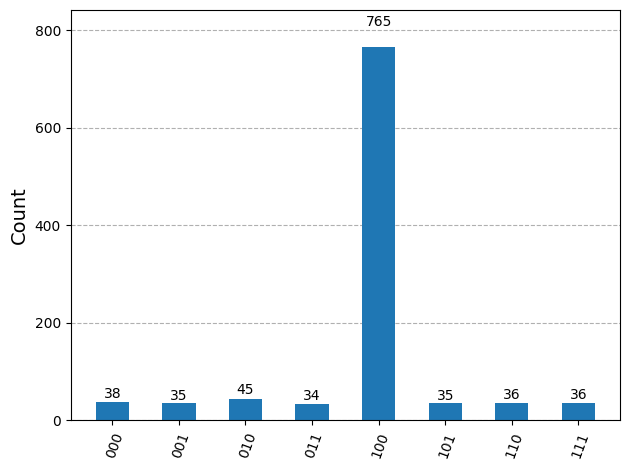


🔹 Searching for marked state: 111
Figure(1290.83x367.889)


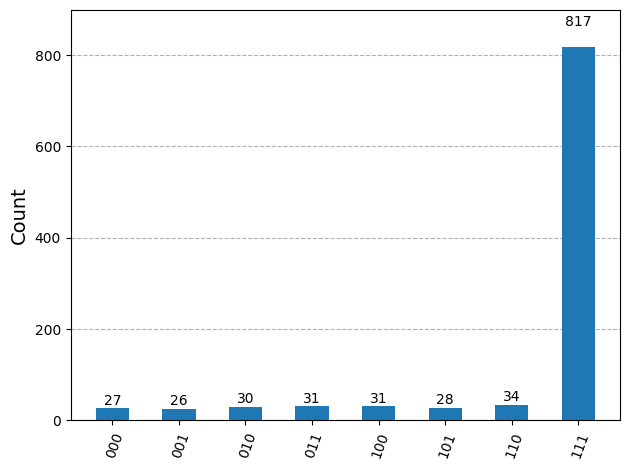


🔹 Searching for marked state: 010
Figure(1458.05x367.889)


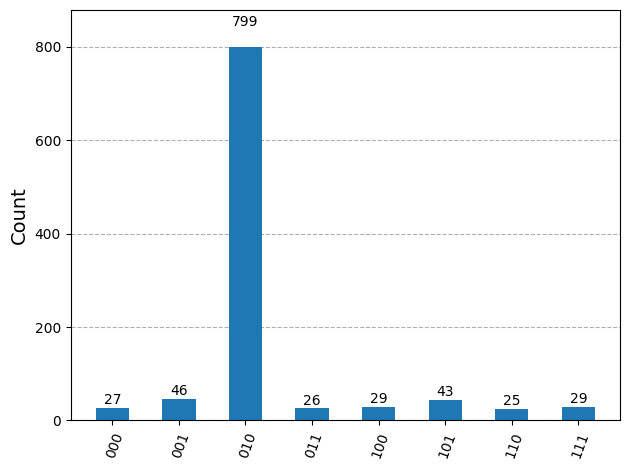

In [24]:
for state in ["001", "111", "010"]:
    print(f"\n🔹 Searching for marked state: {state}")
    qc = grover_search(state)
    print(qc.draw('mpl'))
    run_grover(qc)


In [25]:
# 2

Figure(1374.44x451.5)


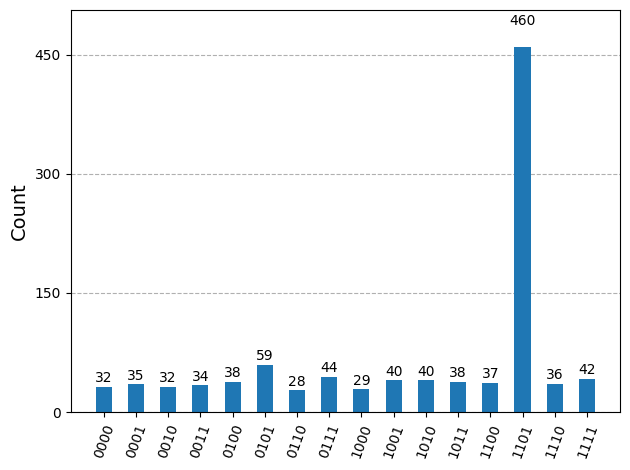

In [26]:
# 4-qubit marked state
marked_state_4q = "1011"
qc_4q = grover_search(marked_state_4q)
print(qc_4q.draw('mpl'))
run_grover(qc_4q)


In [27]:
# 3


🔹 Searching for marked state 101 with 1 iteration(s)


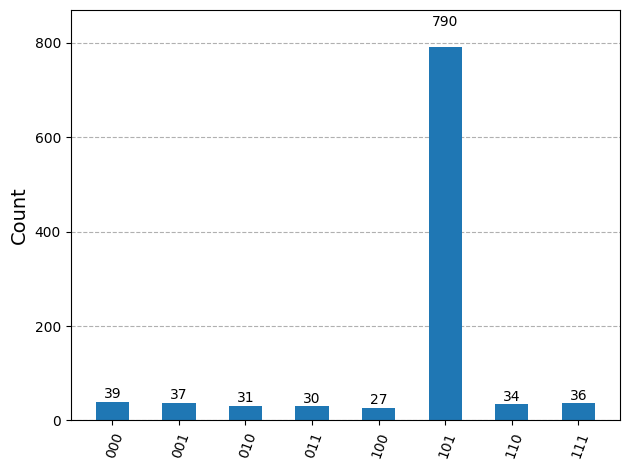


🔹 Searching for marked state 101 with 2 iteration(s)


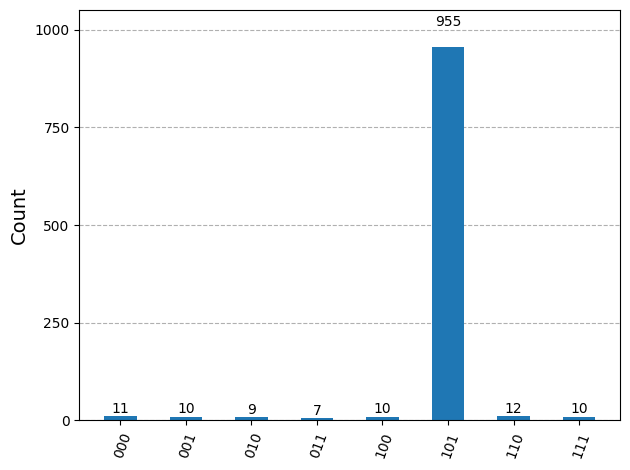


🔹 Searching for marked state 101 with 3 iteration(s)


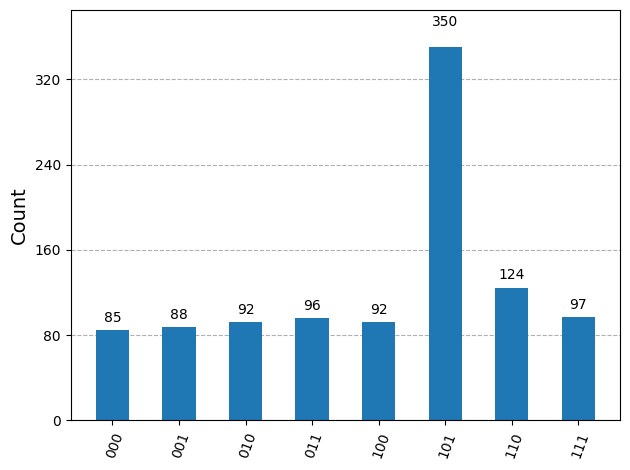

In [28]:
# Increase iterations to amplify the marked state
marked_state = "101"
for iterations in [1, 2, 3]:
    print(f"\n🔹 Searching for marked state {marked_state} with {iterations} iteration(s)")
    qc = grover_search(marked_state, iterations=iterations)
    run_grover(qc)


In [29]:
# 4

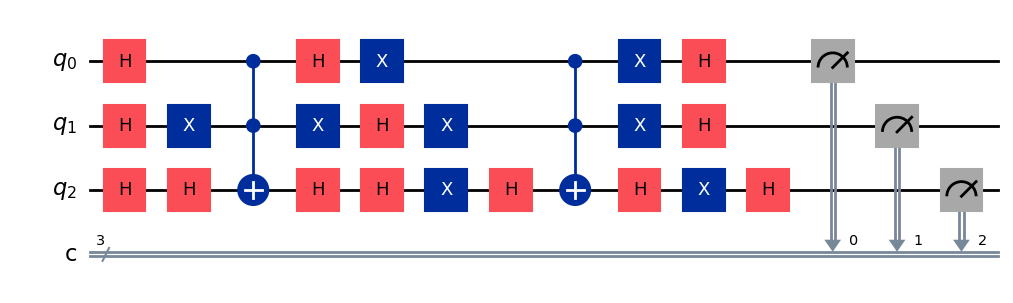

In [30]:
marked_state = "101"
qc = grover_search(marked_state)
# Visualize circuit using matplotlib
qc.draw('mpl')


In [31]:
# 5

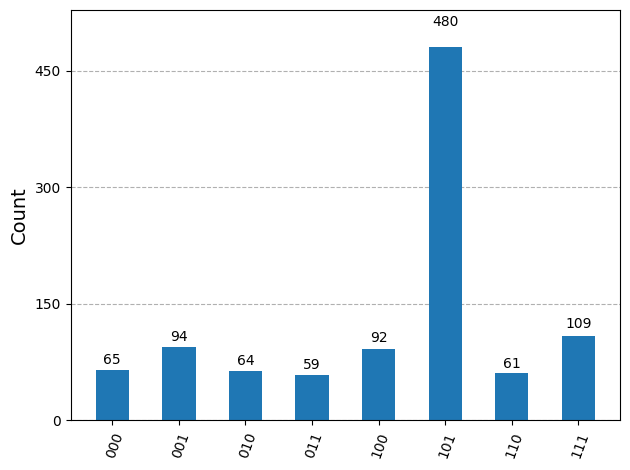

In [32]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Define a simple depolarizing noise model
noise_model = NoiseModel()
error = depolarizing_error(0.05, 1)  # 5% single-qubit depolarizing

# Add errors to all qubits for each gate only once
noise_model.add_all_qubit_quantum_error(error, ['h', 'x', 'mcx'])

# Run Grover with noise
marked_state = "101"
qc = grover_search(marked_state)
simulator = AerSimulator(noise_model=noise_model)
tqc = transpile(qc, simulator)
result = simulator.run(tqc, shots=1024).result()
counts = result.get_counts()
fig=plot_histogram(counts)
display(fig)
plt.show()
